## Modelo Iziquievich 

### La siguiente implementación en JULIA del modelo neuronal, utilizando ecuaciones diferenciales ordinarias y estocásticas. Para ello se retomará algunos tópicos explicados por Dr. Juan Ignacio Perotti en las clases prácticas de Redes Neuronales de la FAMAF  - UNC - Universidad Nacional de Córdoba -  Argentina 

## Descripción del Modelo:

\begin{eqnarray}
\frac{dv}{dt} &=& 0.04 v^{2} + 5v +140 - u +I \\
\frac{dv}{dt} &=& a \big( b \cdot v - u \big)
\end{eqnarray}

## Con las condiciones de reinicio:

\begin{eqnarray}
\text{Si} \ v \geq 30 \ \text{mV}, \ \text{entonces}
\left\lbrace
\begin{array}{ll}
\text{v } \leftarrow & \text{c} \\
\text{u } \leftarrow & \text{u+d}
\end{array}
\right.
\end{eqnarray}

In [15]:
function Paper(du,u,p,t);
    a, b, c, d, I = p  #parámetros de la ecuación diferencial estocástica
    
    du[1] = 0.04*u[1]^2 + 5*u[1] + 140-u[2] + I  # Describe la primera ecuación
    du[2] = a*(b*u[1]-u[2])                      # Describe la segunda ecuación de SDE (Stocastic Differential Eq)
    
end
    

Paper (generic function with 1 method)

## Define las condiciones de Reinicio del Sistema

In [30]:
function periodo(u, t, latencia)
    latencia.u[1] >= 30
end


periodo (generic function with 1 method)

## Expresa el preiodo de latencia del modelo 

In [17]:
function reinicio(latencia)
    latencia.u[1] = latencia.p[3]
    latencia.u[2] += latencia.p[4]
end

reinicio (generic function with 1 method)

## Es el proceso de disparo del ciclo neuronal 

In [18]:
umbral_disparo = DiscreteCallback(periodo,reinicio)


DiscreteCallback{typeof(periodo), typeof(reinicio), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(periodo, reinicio, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1])

## Corriente que pasa por la neurona

In [19]:
paso_corriente = PresetTimeCallback(50,latencia -> latencia.p[5] += 10)

DiscreteCallback{DiffEqCallbacks.var"#60#63"{Int64}, DiffEqCallbacks.var"#61#64"{var"#3#4"}, DiffEqCallbacks.var"#62#65"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, Int64, var"#3#4"}, typeof(SciMLBase.FINALIZE_DEFAULT)}(DiffEqCallbacks.var"#60#63"{Int64}(50), DiffEqCallbacks.var"#61#64"{var"#3#4"}(var"#3#4"()), DiffEqCallbacks.var"#62#65"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, Int64, var"#3#4"}(SciMLBase.INITIALIZE_DEFAULT, true, 50, var"#3#4"()), SciMLBase.FINALIZE_DEFAULT, Bool[1, 1])

## Ciclo Neuronal 

CallbackSet{Tuple{}, Tuple{DiscreteCallback{DiffEqCallbacks.var"#60#63"{Int64}, DiffEqCallbacks.var"#61#64"{var"#3#4"}, DiffEqCallbacks.var"#62#65"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, Int64, var"#3#4"}, typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(periodo), typeof(reinicio), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}((), (DiscreteCallback{DiffEqCallbacks.var"#60#63"{Int64}, DiffEqCallbacks.var"#61#64"{var"#3#4"}, DiffEqCallbacks.var"#62#65"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, Int64, var"#3#4"}, typeof(SciMLBase.FINALIZE_DEFAULT)}(DiffEqCallbacks.var"#60#63"{Int64}(50), DiffEqCallbacks.var"#61#64"{var"#3#4"}(var"#3#4"()), DiffEqCallbacks.var"#62#65"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, Int64, var"#3#4"}(SciMLBase.INITIALIZE_DEFAULT, true, 50, var"#3#4"()), SciMLBase.FINALIZE_DEFAULT, Bool[1, 1]), DiscreteCallback{typeof(periodo), typeof(reinicio), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAU

## Condiciones iniciales del Paper de Izhikevich

In [25]:
p = [0.02, 0.2, -50, 2, 0]
u0 = [-65, p[2]*-65]
tspan = [0.0, 300]




2-element Vector{Float64}:
   0.0
 300.0

In [26]:
  # Resolución del problema 

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 300.0)
u0: 2-element Vector{Float64}:
 -65.0
 -13.0

In [31]:
sol = solve(prob);  # Realiza el cálculo numérico de la solución
print(sol)          # Imprime la solución

OrdinaryDiffEq.ODECompositeSolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, typeof(Paper), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, CallbackSet{Tuple{}, Tuple{DiscreteCallback{DiffEqCallbacks.var"#60#63"{Int64}, DiffEqCallbacks.var"#61#64"{var"#3#4"}, DiffEqCallbacks.var"#62#65"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, Int64, var"#3#4"}, typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(periodo), typeof(reinicio), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}, Tuple{Symbol}, NamedTuple{(:callback,), Tuple{CallbackSet{Tuple{}, Tuple{DiscreteCallback{DiffEqCallbacks.var"#60#63"{Int64}, DiffEqCallbacks.var"#61#64"{var"#3#4"}

7.835655795387613], [-49.64147417498209, 7.781810585355976], [-45.426447883251704, 7.47208566149408], [-34.14645465889413, 7.243351977314744], [-9.93924560190059, 7.137979481690381], [43.487828527745116, 7.1135083318401575], [-50.0, 9.113508331840158], [-49.78374008016211, 9.03350380626744], [-46.91119203028871, 8.623161924566595], [-38.1318586993927, 8.320387347078269], [-18.266833003366504, 8.170606722568252], [24.765138292004647, 8.121720291629744], [116.28012228964245, 8.133013507005744], [-50.0, 10.133013507005744], [-50.016538985623704, 10.073708514941499], [-49.79286657438658, 9.606514490946868], [-47.97319185460348, 9.155566088200448], [-37.2574329673275, 8.707555468859768], [-17.054947993309742, 8.562252866806947], [24.827483008032882, 8.514779505621817], [117.97088965790154, 8.5253226770616], [-50.0, 10.5253226770616], [-50.07765469394974, 10.465694129421298], [-50.963788698164144, 9.930460834950694], [-52.704331450412, 9.373212648050433], [-57.01925384004494, 8.7455401368297

, 12.003947321241903, 12.333475669299956, 12.509674582525038, 12.509674582525038, 12.679095828790498, 13.721834979436657, 14.638598600628988, 15.396334681988732, 15.711974680478201, 15.882560515594863, 15.882560515594863, 16.048225266995676, 17.122253993683163, 18.127684083325647, 19.331845251275265, 20.631987177663397, 21.98756993205452, 23.511632367944095, 24.961229427900566, 26.903950408266113, 29.12573923378459, 32.10299713609748, 35.594466064441086, 39.63125728607619, 44.18115914560245, 49.49641949423606, 50.0, 50.0, 51.0512725866644, 51.848562797591015, 52.279045447773434, 52.51268258898851, 52.51268258898851, 52.715366409905336, 53.494896294572946, 53.75216824166235, 53.75216824166235, 53.99474887549273, 54.68658933014064, 54.98501905507496, 55.15720484989032, 55.15720484989032, 55.31903184210839, 56.06772443298478, 56.43598771574169, 56.63063484640686, 56.63063484640686, 56.81187432453989, 57.719717575896915, 58.05229813047071, 58.23035468178545, 58.23035468178545, 58.401155771

, 0.20025264660183686], [167.34749508514705, 0.21761973180729285], [173.0922382489537, 0.22204730973791129], [171.08500312207883, 0.2205433350192126]], [[171.08500312207883, 0.2205433350192126], [199.76477657168314, 0.2417414854643056], [243.09353422648803, 0.2710230864871466], [579.2248016032282, 0.44075132704634085], [669.8064563435472, 0.4769915990900569], [694.0791595645911, 0.4862767170963631], [692.0374963346619, 0.4855475605424829]], [[171.08500312207883, 0.2205433350192126], [199.76477657168314, 0.2417414854643056], [243.09353422648803, 0.2710230864871466], [579.2248016032282, 0.44075132704634085], [669.8064563435472, 0.4769915990900569], [694.0791595645911, 0.4862767170963631], [692.0374963346619, 0.4855475605424829]], [[8.552679422329222, -0.028946411553415565], [8.803781390284433, -0.027938409826023865], [9.083544325419508, -0.026839680318127], [10.163268117340994, -0.022804106506913266], [10.335098372778516, -0.022189296582366572], [10.37851667046526, -0.02203500684751983],

, -0.24567571194117474], [-6.289520320947094, -0.24832644607881968], [-6.292933927562483, -0.24897774679242016], [-6.270871721187653, -0.24732379180616648]], [[-6.270871721187653, -0.24732379180616648], [-6.2506046943646325, -0.2515389283523367], [-6.0847468424138285, -0.2558128395539304], [-4.7976844240677785, -0.2670685476656475], [-4.673670504874275, -0.2673541146861969], [-4.642810311089514, -0.2674185811916659], [-4.35698611245458, -0.2698034356312775]], [[-4.35698611245458, -0.2698034356312775], [-3.7788413612935177, -0.2724293783549003], [-3.277237426423067, -0.2740612923054631], [-1.4235438403286818, -0.27882781375712506], [-0.9946682666594882, -0.2801998351617422], [-0.8922794146286854, -0.28050589020237554], [-1.4844502420663677, -0.277506708737199]], [[-1.4844502420663677, -0.277506708737199], [-1.1155713795652193, -0.27760183210922035], [-0.8868122284360727, -0.27694451549696114], [0.32766988034440026, -0.27653926134964235], [0.9503564457023792, -0.2783790749175282], [1.104

, -0.21801316467330487], [12.5101245224494, -0.21117016552750492], [15.481038496239659, -0.2018467961492385], [41.69954553667622, -0.14693701463424433], [48.82657061069291, -0.13583663954394573], [50.799607215547134, -0.13292127984364308], [53.38295588644779, -0.12919928354778032]], [[53.38295588644779, -0.12919928354778032], [61.85906176978747, -0.11762726112306368], [74.4504563611051, -0.10193881817383421], [167.67876887243187, -0.014261137652858991], [192.51994457278653, 0.004387337145387704], [199.12599963228712, 0.009137320118377645], [196.50248511573886, 0.007304825161347322]], [[196.50248511573886, 0.007304825161347322], [229.14042287740048, 0.029833266304551957], [278.24183982003984, 0.060832881260954944], [654.251707703274, 0.23904906682913502], [755.3269452260214, 0.2771301713577445], [782.3442729017634, 0.28686855980844966], [777.3260131958993, 0.2851167107608352]], [[196.50248511573886, 0.007304825161347322], [229.14042287740048, 0.029833266304551957], [278.24183982003984, 

, [-0.08500034282100444, -0.4014478819575846]], [[-0.08500034282100444, -0.4014478819575846], [-0.025159544623562624, -0.3999946298425646], [0.05948735211564227, -0.39841342273614955], [0.5392351899896042, -0.39224517764382955], [0.6544649528740507, -0.3912018920688694], [0.683095596061932, -0.3909424409118441], [0.6154275183143874, -0.39120477601863934]], [[0.6154275183143874, -0.39120477601863934], [0.8076089352856108, -0.38926713894332793], [1.0845210979193673, -0.386982788632811], [2.764659771511486, -0.3766586473071234], [3.1856320108443583, -0.37462825460488075], [3.2916822014178067, -0.374122996434929], [3.0707778409671818, -0.37486475684521414]], [[3.0707778409671818, -0.37486475684521414], [3.8849588102139805, -0.37086556065129545], [5.19376131671061, -0.3654038433469111], [16.444498568527933, -0.3323957852295369], [19.539318611205733, -0.3253545478898905], [20.37595285378665, -0.3235338188365797], [20.725420239722737, -0.3228079793014322]], [[20.725420239722737, -0.3228079793

, [487.1290514702663, 0.10436169233904495], [503.21566858262884, 0.11157562146276911], [493.118617540181, 0.1070984695772386]], [[3.634801608547317, -0.3273039678290537], [3.765934524559402, -0.3266091666481261], [3.911476310670796, -0.32585772602480106], [4.462844777536866, -0.32312235275981727], [4.549569368128921, -0.3227102224851814], [4.571411256007142, -0.3226069082329112], [4.5639381763510265, -0.32263452053107466]], [[4.5639381763510265, -0.32263452053107466], [5.360690183023223, -0.31893141883383225], [6.515786630017079, -0.31414116359713484], [14.302817031290274, -0.2893479431198889], [16.3314562196449, -0.28414533594198427], [16.86054026966664, -0.2828358797017637], [16.28634982952334, -0.28412463401699284]], [[16.28634982952334, -0.28412463401699284], [19.255273891928386, -0.2769752361881517], [23.79948178347565, -0.2671360353972457], [60.0845707199799, -0.20967488061073652], [69.93296488756309, -0.19747053732053624], [72.58202063059086, -0.19433437085491473], [72.832059904

, -0.4212258547553781], [-0.49566368938589633, -0.41888702078708817], [0.6486239006346786, -0.4133261928599825], [1.254410974955558, -0.41499796328801836], [1.4065128285730388, -0.4153863120582959], [0.17196853293097902, -0.40830168082271395]], [[0.17196853293097902, -0.40830168082271395], [0.2624790777273702, -0.4055918953109963], [0.3170255595579903, -0.4026016299240206], [0.59790669859985, -0.39300917368330957], [0.726985351982993, -0.3922850500451481], [0.7574353336258, -0.3920929556835964], [0.4951128300620766, -0.390339968007538]], [[0.4951128300620766, -0.390339968007538], [0.5370939167205826, -0.3861006155057418], [0.5590024469371286, -0.3816545689453143], [0.7316876563145485, -0.36710353084799324], [0.8210558956720035, -0.3656316757613989], [0.8420512948579812, -0.3652561838686265], [0.6603882146786546, -0.363738433605337]], [[0.6603882146786546, -0.363738433605337], [0.6912133132184977, -0.3585723685115128], [0.7133245796631336, -0.35322417825750696], [0.8763317071122287, -0.

, -0.3776089601696718], [1.875304131054218, -0.3749406357389015], [4.364092032785919, -0.36235377896541], [4.990405700084333, -0.3597993396042796], [5.1493151594008175, -0.35916283137966276], [4.847883247647726, -0.3601051958602912]], [[4.847883247647726, -0.3601051958602912], [5.776211013350466, -0.3563300695213975], [7.148106658884098, -0.351361646424842], [16.7044435359305, -0.32468321071534517], [19.23018235175286, -0.31896793724630346], [19.88896647339863, -0.31752815284309394], [19.185534666149444, -0.31892678970303645]], [[19.185534666149444, -0.31892678970303645], [22.465632803188303, -0.31192919845533623], [27.35093351546577, -0.3024372512485214], [63.18923261756734, -0.24922447593158203], [72.75311891694213, -0.23780112142515722], [75.2838060465882, -0.23489965595962323], [73.8469236041375, -0.23647386003653048]], [[73.8469236041375, -0.23647386003653048], [86.45518086771897, -0.22254617808603683], [105.49037478511356, -0.20333598671711656], [252.06480859037535, -0.0922325378

, -0.06689307988451863]], [[143.29189110157768, -0.06689307988451863], [166.93230535780344, -0.04779473902037234], [202.39519264762296, -0.021579486013582738], [471.6007271970647, 0.12832749888700068], [543.8317257675652, 0.16037174000460117], [563.1079514322519, 0.16855660187897809], [558.2712097348801, 0.16655980435768883]], [[143.29189110157768, -0.06689307988451863], [166.93230535780344, -0.04779473902037234], [202.39519264762296, -0.021579486013582738], [471.6007271970647, 0.12832749888700068], [543.8317257675652, 0.16037174000460117], [563.1079514322519, 0.16855660187897809], [558.2712097348801, 0.16655980435768883]], [[5.220778799866132, -0.29558442400267737], [5.392107039061596, -0.294757272566466], [5.58219259355508, -0.29386141494221585], [6.305203810462235, -0.29059571039552334], [6.419040736804721, -0.2901030185723866], [6.4477413294414525, -0.28997946879848374], [6.438761989000126, -0.29001197562017866]], [[6.438761989000126, -0.29001197562017866], [7.58092928062395, -0.28

, [1291.8548166193852, 0.29961864995764864], [1298.0039157401998, 0.3013740659343023]], [[-0.5253300859107526, -0.41050660171821507], [-0.5280122305011332, -0.4103635850074238], [-0.5309025598390598, -0.41021678969660563], [-0.5412684450374528, -0.40971237913824654], [-0.5427994612446874, -0.4096423680197664], [-0.5431831128329137, -0.4096249035961785], [-0.5431162382717396, -0.40962464968403334]], [[-0.5431162382717396, -0.40962464968403334], [-0.5702086570859741, -0.4083465845308074], [-0.6092745837586335, -0.407088076381553], [-0.8283613353105252, -0.4031711406945074], [-0.8814060239165222, -0.40273212780176265], [-0.8943508295414873, -0.40262206064859785], [-0.8571192234642453, -0.40246464865910314]], [[-0.8571192234642453, -0.40246464865910314], [-0.9428061722933272, -0.40142807882107695], [-1.0641913268754877, -0.4005292203725665], [-1.7086889729533823, -0.3987191479488077], [-1.857923862066123, -0.39881081427599696], [-1.8939229579416974, -0.39883139272815454], [-1.7850643987234

[2.537477779360586, -0.35446115922332455], [2.5743106186516123, -0.35424856857192116], [2.583563380441145, -0.35419532936342046], [2.5817796931364505, -0.35420216936444554]], [[2.5817796931364505, -0.35420216936444554], [3.023420762708099, -0.3516799011138639], [3.635682236173473, -0.3485612744303858], [7.215006200272981, -0.3338184308896821], [8.08875733906941, -0.3308284704076746], [8.31182007569007, -0.330082192538885], [7.936875483799167, -0.3311515124680873]], [[7.936875483799167, -0.3311515124680873], [9.295112061792024, -0.32660773097170037], [11.281827134164272, -0.3206046699807332], [25.012667429775437, -0.28848601531797485], [28.617530479174782, -0.28164393953762845], [29.56113443658326, -0.2799178087192239], [28.655749850149824, -0.2814668649879037]], [[28.655749850149824, -0.2814668649879037], [33.385745956959965, -0.2730492946929534], [40.40707480046231, -0.2616352046363994], [91.75390092040072, -0.19786003831878873], [105.42413358566246, -0.18420433570302652], [109.044485

], [[18.01137570122694, -0.194853554527591], [20.705482280147336, -0.18795904622114287], [24.65257621493334, -0.17883789690059498], [52.954034591366494, -0.1299054358803498], [60.411188574373185, -0.11966294431220773], [62.38756059978288, -0.11706171453954614], [61.3245904376786, -0.11840083207200276]], [[61.3245904376786, -0.11840083207200276], [71.45731958905257, -0.10558184001005536], [86.70648075293408, -0.08802105097604322], [203.8523668870682, 0.012449614499595607], [235.34956325471478, 0.03382165902154762], [243.7770393055841, 0.03929001939697229], [242.52442245391921, 0.03852991034105064]], [[242.52442245391921, 0.03852991034105064], [284.28380008787326, 0.06439332459629753], [347.88520069114526, 0.1003180990462322], [852.563883692308, 0.31139482195250834], [989.1442731084422, 0.35639516217543404], [1025.8942252707648, 0.36796214885880263], [1029.2409113952986, 0.369057199461199]], [[242.52442245391921, 0.03852991034105064], [284.28380008787326, 0.06439332459629753], [347.88520

], [[-0.09022065367624066, -0.40154005593753456], [-0.031153413893171944, -0.40008567327515165], [0.052462786198255174, -0.3985042618712905], [0.5270020050220232, -0.3923413839154821], [0.6410564035417892, -0.3913003892526045], [0.6693935896320333, -0.3910415029722802], [0.6023617893152391, -0.39130160661441304]], [[0.6023617893152391, -0.39130160661441304], [0.7926163534743793, -0.38936662414313217], [1.0669023409110814, -0.3870870117127261], [2.732348399383568, -0.3767925393650053], [3.149792251292588, -0.374769428261302], [3.2549427310441743, -0.37426598550342316], [3.035597834388227, -0.3750040270442183]], [[3.035597834388227, -0.3750040270442183], [3.8426223552691425, -0.3710187216688712], [5.140111006837564, -0.3655785944518742], [16.291455457291242, -0.3327168828195676], [19.359030953210535, -0.3257065958706844], [20.188169342264814, -0.3238940635691823], [20.529635215352897, -0.3231816094428885]], [[20.529635215352897, -0.3231816094428885], [24.008891090900423, -0.3160374681526

Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Vector{Float64}, Vector{Float64}}, SciMLBase.UJacobianWrapper{ODEFunction{true, typeof(Paper), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Float64, Vector{Float64}}, LinearSolve.LinearCache{Matrix{Float64}, Vector{Float64}, Vector{Float64}, SciMLBase.NullParameters, GenericLUFactorization{LinearAlgebra.RowMaximum}, LinearAlgebra.LU{Float64, Matrix{Float64}}, LinearSolve.InvPreconditioner{LinearAlgebra.Diagonal{Float64, Vector{Float64}}}, LinearAlgebra.Diagonal{Float64, Vector{Float64}}, Float64}, FiniteDiff.JacobianCache{Vector{Float64}, Vector{Float64}, Vector{Float64}, UnitRange{Int64}, Nothing, Val{:forward}(), Float64}, FiniteDiff.GradientCache{Nothing, Vector{Float64}, Vector{Float64}, Float64, Val{:forward}(), Float64, Val{true}(

, [-50.0, 9.113484101716498], [-49.78371090161431, 9.033472138606887], [-46.910745780734594, 8.62311063686764], [-38.130001056640815, 8.320339273823658], [-18.265536841249524, 8.170585633576618], [24.76873163861565, 8.121702700786283], [116.28784966904651, 8.132998558296164], [-50.0, 10.132998558296164], [-50.016536074020166, 10.073696012470098], [-49.792843999120976, 9.606511967915859], [-47.97315858894828, 9.155570261414091], [-37.25758377659663, 8.707565368606234], [-17.055147144095873, 8.562260898896247], [24.82712080863127, 8.514786967044591], [117.97012744519392, 8.52532985402383], [-50.0, 10.52532985402383], [-50.07765620555192, 10.465700990900762], [-50.96380410126116, 9.930471136863085], [-52.704381163660486, 9.373228764520487], [-57.01937177884322, 8.745561125314891], [-63.955173235806264, 8.088926059327088], [-70.08270729856935, 7.112948503740989], [-70.70873004713035, 6.273319262838399], [-70.01509255348611, 5.51393632994345], [-68.43689829290348, 4.499474028147572], [-66.0

, 108.87675413079029, 109.31150356030203, 109.55558375250621, 109.55558375250621, 109.76553765166544, 110.87093179541645, 111.75264313694385, 112.27561664814355, 112.56386749829247, 112.7117203896303, 112.7117203896303, 112.85920777740164, 114.0370070038404, 115.21122694806922, 116.4714444610611, 116.97237071333575, 117.24570115863523, 117.39477020828585, 117.39477020828585, 117.54018284924706, 118.85883954810183, 120.25218603179697, 121.8230597108205, 123.42435038380991, 125.7330716919482, 127.75017039448574, 129.6511350747144, 132.34151083585314, 135.5773237057237, 140.45874223820297, 142.44892704852094, 143.34699171339093, 143.91087289583317, 144.23235243759208, 144.39807454590886, 144.39807454590886, 144.56001360329205, 145.50226206550855, 145.90221215780122, 146.10869182809157, 146.10869182809157, 146.30043087392738, 147.23974811102306, 147.79150615754486, 147.9865780266908, 147.9865780266908, 148.19128092576872, 149.12226692105298, 149.74921317842276, 150.0342762413761, 150.18702

, -0.0658460080595772], [7.825554467635788, -0.06535768453148087], [7.858301776455142, -0.06523515579631732], [7.848643233446563, -0.06526963452550824]], [[7.848643233446563, -0.06526963452550824], [9.254378583847496, -0.06022568404194001], [11.420959947861052, -0.053250219600294246], [29.288175355873285, -0.012002755356545887], [34.1456965671196, -0.003340900130818092], [35.46414967235668, -0.0010997263036444593], [36.07490714112562, -2.8504428049629383e-5]], [[36.07490714112562, -2.8504428049629383e-5], [41.989060293447835, 0.009477023531256705], [50.841585255790726, 0.022498817668867323], [117.63599202927836, 0.09666905801206577], [135.53126812458882, 0.11251880290062886], [140.3021928357282, 0.11656427990717222], [138.91120926205056, 0.11543203853978068]], [[138.91120926205056, 0.11543203853978068], [161.7932266635755, 0.1340474994614194], [196.09041970681824, 0.15963122125032653], [455.74112174012, 0.306038532682773], [525.3690309912591, 0.3373802731525271], [543.9406199093028, 0.

[0.3032153036178631, -0.2193410110488637], [0.30240934608652736, -0.21612712722697935], [0.3370957808417785, -0.20541066302925892], [0.3661313988771351, -0.20408545401221154], [0.3733419906360105, -0.20375668752870504], [0.3091807942448668, -0.2033908043111807]], [[0.3091807942448668, -0.2033908043111807], [0.3130702561193637, -0.19994326018844547], [0.31256156629325105, -0.19646095781602818], [0.36134433584105885, -0.18495063485835672], [0.39976780171980053, -0.18359757074646266], [0.40924097246610813, -0.1832620823976955], [0.3254029137002554, -0.18269020600345562]], [[0.3254029137002554, -0.18269020600345562], [0.3318218893576663, -0.17906019447619761], [0.3327117750212061, -0.175389075156257], [0.39757790184979314, -0.16335846059881406], [0.4418296783194915, -0.16202719911579533], [0.4524850511358185, -0.16169540219641257], [0.35891008612769326, -0.1608648986136994]], [[0.35891008612769326, -0.1608648986136994], [0.37135969100587474, -0.1568831144687845], [0.3768024331907025, -0.15

, 0.17168125158038977]], [[145.8607798258974, -0.06455088371456949], [169.96320651197007, -0.045255329768510634], [206.13860772988062, -0.018757869788634304], [481.17695028129987, 0.13291051561482728], [554.9991540555279, 0.16533045217430398], [574.7052470595153, 0.17361291189897224], [569.973961110878, 0.17168125158038977]], [[5.230478303113173, -0.29539043393773656], [5.400651596590949, -0.29456917083660467], [5.589345940824439, -0.2936800333964014], [6.306441447143918, -0.29044050000657295], [6.419215759028848, -0.28995214313784196], [6.447647055270123, -0.2898296816236452], [6.438881443735523, -0.28986143470223924]], [[6.438881443735523, -0.28986143470223924], [7.5776987138307845, -0.2851006361952234], [9.28076460393639, -0.27878974096281056], [22.04688611919608, -0.244262132395936], [25.47218970214628, -0.23702626589430623], [26.383281697579367, -0.23518395582344107], [26.044871590437236, -0.23579298980557334]], [[26.044871590437236, -0.23579298980557334], [31.069749626077716, -0.

, -0.4096960906600559], [-0.5458334824710676, -0.4096787477409039], [-0.5457664106066886, -0.4096784929258098]], [[-0.5457664106066886, -0.4096784929258098], [-0.573266503681161, -0.40840882139327817], [-0.6128631395541575, -0.40715931558357193], [-0.8343661991046147, -0.40327574123200666], [-0.8879075002306571, -0.40284207165015806], [-0.9009741965855298, -0.402733330851512], [-0.8634577228470377, -0.40257466085527355]], [[-0.8634577228470377, -0.40257466085527355], [-0.9499898386547407, -0.40154814364068797], [-1.0723976528082595, -0.4006603288884908], [-1.7205291448962576, -0.39889030637044415], [-1.870339487072691, -0.3989883104999252], [-1.9064763551512627, -0.3990104573058008], [-1.7973303817802844, -0.39845936258476927]], [[-1.7973303817802844, -0.39845936258476927], [-2.043315359487984, -0.3982629374682206], [-2.3708229007375365, -0.3985788753405034], [-3.724925381679526, -0.403171953388822], [-3.97141439030845, -0.4048758527667289], [-4.025993013183388, -0.40529013548232046], 

, [7.216074277669815, -0.3338150130285713], [8.090066780642802, -0.33082443338449624], [8.31319239994922, -0.3300779999689059], [7.9381616138387265, -0.3311475047628884]], [[7.9381616138387265, -0.3311475047628884], [9.296695634737308, -0.32660309611698934], [11.28389222974267, -0.3205990900562932], [25.01897862189017, -0.28847400751905683], [28.625041145629986, -0.28163050725169686], [29.568968098457407, -0.2799040075894016], [28.663589359091105, -0.28145285818187143]], [[28.663589359091105, -0.28145285818187143], [33.395152063723884, -0.27303366169566223], [40.41895994535819, -0.2616171641518836], [91.78717538158989, -0.1978260232754503], [105.46334385043171, -0.18416687801019357], [109.08530511240468, -0.1806962268975889], [107.11733663420269, -0.18251657204140997]], [[107.11733663420269, -0.18251657204140997], [125.53312122980647, -0.16553560353839575], [153.46677058539922, -0.14202323932537583], [371.8845067889723, -0.004865882857133421], [430.8797724943377, 0.02445720142316116], 

, -0.1183976929552401], [71.4601229636421, -0.1055784355975801], [86.70993117365336, -0.08801726784898853], [203.8610549225803, 0.012455739526055373], [235.35967560910848, 0.033828285086409116], [243.7875359733244, 0.03929677530322254], [242.53499666315722, 0.03853673407674257]], [[242.53499666315722, 0.03853673407674257], [284.2962335700016, 0.06440072658077434], [347.90048420892583, 0.10032631439331971], [852.6021889520338, 0.31140793878292194], [989.1888272223673, 0.3564093232927014], [1025.9404663874288, 0.3679765798388692], [1029.287546421394, 0.3690717298403828]], [[242.53499666315722, 0.03853673407674257], [284.2962335700016, 0.06440072658077434], [347.90048420892583, 0.10032631439331971], [852.6021889520338, 0.31140793878292194], [989.1888272223673, 0.3564093232927014], [1025.9404663874288, 0.3679765798388692], [1029.287546421394, 0.3690717298403828]], [[6.912597922708651, -0.261748041545827], [7.100948085612615, -0.2608906484445841], [7.308358301798247, -0.2599666295130444], [

], [[0.6023605773111953, -0.3913016153548011], [0.7926149635737261, -0.3893666331167489], [1.066900709032474, -0.3870870211096719], [2.7323454206930577, -0.37679255142508783], [3.1497889500938996, -0.3747694409774385], [3.254939347629211, -0.3742659983830845], [3.0355945938597912, -0.37500403958407497]], [[3.0355945938597912, -0.37500403958407497], [3.8426184632517604, -0.3710187354485463], [5.140106090124654, -0.36557861015383225], [16.29144166305308, -0.33271691139117415], [19.359014726070434, -0.32570662717861554], [20.188152447957826, -0.32389409559820537], [20.529617703215273, -0.3231816424785112]], [[20.529617703215273, -0.3231816424785112], [24.008871085626332, -0.3160375034042112], [29.176317683335927, -0.30635671667162373], [66.77663549518684, -0.2522808742584969], [76.78768540714964, -0.24066464608785978], [79.43321603731138, -0.23771670778064988], [77.79712514489486, -0.23946580655430844]], [[77.79712514489486, -0.23946580655430844], [90.7231994487422, -0.225560753386966], [

, [4.571633824025552, -0.3226052745599332], [4.5641569732345815, -0.32263290045429754]], [[4.5641569732345815, -0.32263290045429754], [5.36104708975472, -0.3189292506932274], [6.516391573277112, -0.3141381505367211], [14.305977784393866, -0.28933887200081077], [16.335373983689248, -0.2841349025919875], [16.86466307458376, -0.28282509362318325], [16.290504507233713, -0.2841136235314972]], [[16.290504507233713, -0.2841136235314972], [19.260451819337206, -0.276962720561444], [23.80639006211792, -0.2671211651528166], [60.10920101831781, -0.20964246671974207], [69.96255364173689, -0.19743452484355828], [72.61300224389616, -0.19429737865846103], [72.86567413081275, -0.19395888004888243]], [[72.86567413081275, -0.19395888004888243], [84.90431001416691, -0.18040417363115036], [102.91834732237926, -0.16184928710768984], [238.39188859225473, -0.05630575990488885], [274.67932843230335, -0.033722971571463256], [284.34361202537576, -0.0279629673166699], [281.15689216751497, -0.02980476923506979]], 

[0.3170564879042388, -0.4026010627609605], [0.5979192102925808, -0.39300829800575954], [0.7269919885308767, -0.39228411271540853], [0.7574405791533039, -0.39209200362165264], [0.4951287227314829, -0.39033907862782]], [[0.4951287227314829, -0.39033907862782], [0.5371067494083519, -0.38609963529010627], [0.5590137258906402, -0.381653506503283], [0.7316909597540544, -0.3671021581376148], [0.821054245953384, -0.36563023453291055], [0.8420484561492358, -0.36525472590662234], [0.6603966003856598, -0.3637370477986264]], [[0.6603966003856598, -0.3637370477986264], [0.6912224498473449, -0.3585708425275277], [0.7133345733926539, -0.35322250694989266], [0.8763498629362765, -0.335248159493116], [0.9300782606307543, -0.3331019061027039], [0.942571160727482, -0.3325563336051427], [0.8659400050863155, -0.33149575377186224]], [[0.8659400050863155, -0.33149575377186224], [0.9543515927981652, -0.32356328866175027], [1.0476037994514655, -0.315065151958053], [1.8095911319416764, -0.2847301665183898], [1.9

, [7.148124615523063, -0.35136157511465743], [16.704497478666102, -0.32468307456867124], [19.230246434429787, -0.31896778669619247], [19.889033281480685, -0.31752799856713276], [19.185601381438154, -0.31892663360378626]], [[19.185601381438154, -0.31892663360378626], [22.465706305938514, -0.3119290392277443], [27.351015157948822, -0.3024370902507535], [63.18933487063627, -0.24922433981785605], [72.75322366909622, -0.2378009909798834], [75.28391105174431, -0.23489952727634028], [73.84701237681075, -0.23647374868577953]], [[73.84701237681075, -0.23647374868577953], [86.45528587275398, -0.22254605707232514], [105.49050498092701, -0.20333585181779967], [252.06514867012382, -0.09223231535477602], [291.55236589689287, -0.06843693180551179], [302.10792404206734, -0.06235025025315466], [300.26197733519984, -0.06335887733706602]], [[300.26197733519984, -0.06335887733706602], [352.205292202958, -0.03473975147069714], [431.2837966996364, 0.00504528325323804], [1056.9023948919337, 0.238937126840617

, [558.2712363207395, 0.16655981573010667]], [[143.29188496383682, -0.06689308491600378], [166.93229934387517, -0.04779474356877665], [202.3951873988475, -0.021579489587605957], [471.60074041711215, 0.12832750509721355], [543.831744726561, 0.1603717482518438], [563.1079720788531, 0.16855661069555974], [558.2712363207395, 0.16655981573010667]], [[5.220778805519091, -0.2955844238896182], [5.392107045983021, -0.29475727244752287], [5.582192601973887, -0.293861414816614], [6.305203825114798, -0.29059571024425374], [6.419040752548167, -0.2901030184169248], [6.447741345461232, -0.2899794686419695], [6.438762004832705, -0.2900119754643202]], [[6.438762004832705, -0.2900119754643202], [7.58092930742966, -0.2852398736897766], [9.290564640704996, -0.278909956280597], [22.138454191085124, -0.24422453505696862], [25.58786337742984, -0.23695511870262123], [26.505744575919312, -0.2351037282545245], [26.180188528499517, -0.23568627784848]], [[26.180188528499517, -0.23568627784848], [31.24242489406874

, [-0.5431831192248389, -0.4096249038967878], [-0.5431162446911557, -0.409624649984748]], [[-0.5431162446911557, -0.409624649984748], [-0.5702086588138258, -0.4083465851277594], [-0.6092745762412051, -0.40708807725948], [-0.8283612509838107, -0.4031711423132825], [-0.8814059177703797, -0.4027321294678717], [-0.8943507181024728, -0.40262206232670167], [-0.8571191292079661, -0.40246465041333723]], [[-0.8571191292079661, -0.40246465041333723], [-0.9428060548691484, -0.40142808057466584], [-1.0641911750328958, -0.40052922206713093], [-1.7086886323727626, -0.39871914894618943], [-1.8579234776630074, -0.39881081503974314], [-1.8939225632564067, -0.3988313934346478], [-1.7850640414664483, -0.39828211789500073]], [[-1.7850640414664483, -0.39828211789500073], [-2.029966930462418, -0.3980733709993386], [-2.356518759507253, -0.39837658938328624], [-3.7106319605610736, -0.40293812219071], [-3.957767123555257, -0.40464123650411465], [-4.012490586469703, -0.4050553008506072], [-3.794071178821113, -0

, nothing, nothing, nothing, nothing, nothing, nothing, nothing, SciMLBase.DEFAULT_OBSERVED, nothing), 0.0, [0.02, 0.2, -50.0, 2.0, 20.0]), [0.0, 0.0], LinearSolve.LinearCache{Matrix{Float64}, Vector{Float64}, Vector{Float64}, SciMLBase.NullParameters, GenericLUFactorization{LinearAlgebra.RowMaximum}, LinearAlgebra.LU{Float64, Matrix{Float64}}, LinearSolve.InvPreconditioner{LinearAlgebra.Diagonal{Float64, Vector{Float64}}}, LinearAlgebra.Diagonal{Float64, Vector{Float64}}, Float64}([0.0 6.9044660738077e-310; 6.9044660958225e-310 0.0], [0.0, 0.0], [0.0, 0.0], SciMLBase.NullParameters(), GenericLUFactorization{LinearAlgebra.RowMaximum}(LinearAlgebra.RowMaximum()), LinearAlgebra.LU{Float64, Matrix{Float64}}(Matrix{Float64}(undef, 0, 0), Int64[], 0), true, LinearSolve.InvPreconditioner{LinearAlgebra.Diagonal{Float64, Vector{Float64}}}([6.90435160959507e-310 0.0; 0.0 6.9043516095927e-310]), [6.90435160959507e-310 0.0; 0.0 6.9043516095927e-310], 1.4901161193847656e-8, 1.4901161193847656e-8, 

## Gráfico de uno delo s comportamientos neuronales del modelo de Izhikevich descripto en su paper

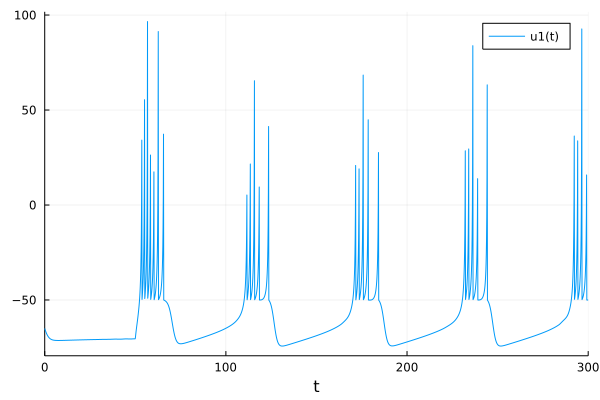

In [28]:
plot(sol, vars=1)
